In [4]:
!pip install xlrd

In [81]:
!pip install parse

  Created wheel for parse: filename=parse-1.18.0-py3-none-any.whl size=24138 sha256=ba8413a5cff9a7228d4fef20a692d99c25d601568fb4d85ebaf3c01cb7e7b449
  Stored in directory: c:\users\14686\appdata\local\pip\cache\wheels\05\d6\62\d7e3a31cb5ac82c57423e083738882b792a9108b30cc05f579
Successfully built parse


In [82]:
import pandas as pd
import numpy as np
import parse

In [9]:
df = pd.read_excel("附件一：325个样本数据.xlsx", skiprows=[0, 1])

In [18]:
columns = pd.Series(df.columns)
columns[:2] = ["sample_index", "time"]
df.columns = columns

In [22]:
df.head()

,sample_index,time,"硫含量,μg/g",辛烷值RON,"饱和烃,v%（烷烃+环烷烃）","烯烃,v%","芳烃,v%","溴值\n,gBr/100g","密度(20℃),\nkg/m³","硫含量,μg/g.1",...,再生器藏量,加氢裂化轻石脑油进装置流量,汽油产品去气分流量,加氢裂化轻石脑油进装置累积流量,汽油产品去气分累积流量,8.0MPa氢气至循环氢压缩机入口,8.0MPa氢气至循环氢压缩机入口.1,8.0MPa氢气至反吹氢压缩机出口,8.0MPa氢气至反吹氢压缩机出口.1,D101原料缓冲罐压力
0,1,2020/5/26 8:00:00,188.0,90.6,53.230000,24.400000,22.370000,61.487143,726.085714,3.2,...,2.045436,6368.74700,233.310805,83086802.0,832503.795,2216.40935,39063124.5,1840.14470,39608757.0,0.353271
1,2,2020/5/21 8:00:00,169.0,90.5,52.300000,26.400000,21.300000,61.880000,731.300000,3.2,...,2.025974,6360.64530,242.369205,82318954.0,803462.665,2370.58740,38810581.5,1641.73260,39389299.0,0.354504
2,3,2020/5/19 8:00:00,177.0,90.7,52.300000,26.314286,21.385714,61.722857,729.614286,3.2,...,1.964696,6504.96490,233.076925,82012004.0,791925.055,2326.46535,38693812.0,1600.67575,39312616.5,0.350181
3,4,2020/5/14 8:00:00,159.0,90.4,52.300000,26.100000,21.600000,61.330000,725.400000,3.2,...,2.039041,6506.82495,238.349935,81231373.5,762863.810,2495.22360,38410862.5,1563.71215,39120204.5,0.353930
4,5,2020/5/12 8:00:00,173.0,89.6,52.242857,26.671429,21.085714,61.332857,725.428571,3.2,...,1.986900,6560.24225,236.576220,80915707.5,751362.300,2807.78910,38283000.0,1554.35740,39045953.5,0.358053


## 原料性质

In [26]:
df.iloc[:,2:9].head()

,"硫含量,μg/g",辛烷值RON,"饱和烃,v%（烷烃+环烷烃）","烯烃,v%","芳烃,v%","溴值\n,gBr/100g","密度(20℃),\nkg/m³"
0,188.0,90.6,53.230000,24.400000,22.370000,61.487143,726.085714
1,169.0,90.5,52.300000,26.400000,21.300000,61.880000,731.300000
2,177.0,90.7,52.300000,26.314286,21.385714,61.722857,729.614286
3,159.0,90.4,52.300000,26.100000,21.600000,61.330000,725.400000
4,173.0,89.6,52.242857,26.671429,21.085714,61.332857,725.428571


In [27]:
df.iloc[:,2:9].shape

(325, 7)

## 产品性质（2标签）

In [28]:
df.iloc[:,9:12].head()

,"硫含量,μg/g.1",辛烷值RON.1,RON损失\n（不是变量）
0,3.2,89.22,1.38
1,3.2,89.32,1.18
2,3.2,89.32,1.38
3,3.2,89.02,1.38
4,3.2,88.32,1.28


## 待生吸附剂性质

In [29]:
df.iloc[:,12:14].head()

,"焦炭,wt%","S, wt%"
0,2.32,7.30
1,2.37,7.34
2,2.43,7.27
3,3.08,7.35
4,2.45,6.58


## 再生吸附剂性质

In [30]:
df.iloc[:,14:16].head()

,"焦炭,wt%.1","S, wt%.1"
0,1.84,5.98
1,0.55,4.38
2,1.89,5.82
3,0.98,4.67
4,0.83,4.52


## 354个操作变量

In [39]:
df.iloc[:,16:]

,氢油比,反应过滤器压差,还原器压力,还原器流化氢气流量,反应器上部温度,反应器底部温度,反应器顶部压力,反应器顶底压差,反应过滤器压差.1,反吹氢气温度,...,再生器藏量,加氢裂化轻石脑油进装置流量,汽油产品去气分流量,加氢裂化轻石脑油进装置累积流量,汽油产品去气分累积流量,8.0MPa氢气至循环氢压缩机入口,8.0MPa氢气至循环氢压缩机入口.1,8.0MPa氢气至反吹氢压缩机出口,8.0MPa氢气至反吹氢压缩机出口.1,D101原料缓冲罐压力
0,0.276318,31.211968,2.526857,647.752380,424.615900,421.608145,2.393991,101.290580,33.480159,240.088445,...,2.045436,6368.74700,233.310805,83086802.00,832503.795,2.216409e+03,39063124.50,1840.14470,39608757.0,0.353271
1,0.277127,31.461969,2.527411,651.821920,420.953385,417.927830,2.394113,101.544925,33.324023,239.809820,...,2.025974,6360.64530,242.369205,82318954.00,803462.665,2.370587e+03,38810581.50,1641.73260,39389299.0,0.354504
2,0.277013,31.339998,2.528865,650.747150,423.941065,420.003515,2.394545,101.618320,33.251831,239.742695,...,1.964696,6504.96490,233.076925,82012004.00,791925.055,2.326465e+03,38693812.00,1600.67575,39312616.5,0.350181
3,0.277222,31.033443,2.530589,652.669055,423.722805,419.964775,2.392854,105.029760,33.197268,239.732465,...,2.039041,6506.82495,238.349935,81231373.50,762863.810,2.495224e+03,38410862.50,1563.71215,39120204.5,0.353930
4,0.277310,30.826894,2.530938,649.340920,427.132000,422.128935,2.392715,105.937455,32.785944,239.835635,...,1.986900,6560.24225,236.576220,80915707.50,751362.300,2.807789e+03,38283000.00,1554.35740,39045953.5,0.358053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0.238174,18.169647,2.392515,819.708705,424.567210,423.932695,2.299256,52.717846,1293.641175,244.986360,...,3.454565,8328.97475,150.441617,84087479.25,2136687.475,3.159956e+06,1569503.75,-7028.11670,1003276.5,-118.251152
321,0.239947,18.356451,2.393195,820.912883,425.062968,424.276302,2.298786,54.426241,1298.162100,244.937650,...,2.752566,8457.86080,148.748365,83687113.25,2129270.425,3.662122e+06,1521263.75,-8555.30420,879436.8,-118.764337
322,0.237478,18.477196,2.398691,818.246100,425.390800,424.563592,2.301724,54.764742,1304.943400,245.025612,...,2.935758,8246.20925,150.095445,83087625.75,2118469.700,4.415371e+06,1448903.75,-10846.08550,693676.8,-119.534108
323,0.235185,18.626541,2.394805,820.887623,426.057338,425.133608,2.296625,55.948335,1309.464275,244.818115,...,3.174031,7998.80235,149.533987,82696129.75,2110959.450,4.917538e+06,1400663.75,-12373.27275,569836.8,-120.047287


In [43]:
eq_0 = (df==0).sum()

In [45]:
from collections import Counter

每列缺失值分布情况

<AxesSubplot:>

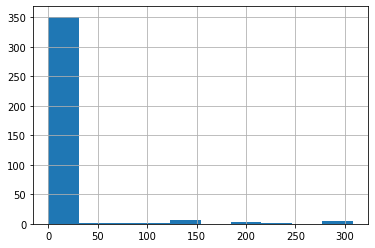

In [47]:
eq_0.hist()

缺失率超过 1/6 

In [52]:
df.columns[eq_0>50].size

18

In [152]:
H = 100; display(df.columns[eq_0>H]); df.columns[eq_0>H].size

Index(['D105流化氢气流量', '新氢进装置流量', '轻烃出装置流量', '污油出装置', '1#催化汽油进装置流量',
       'D121顶去放火炬流量', '再生冷氮气流量', '0.2', '新氢进装置流量.1', '0.20', 'D-109松动风流量',
       '进料调节阀旁路流量', '紧急氢气去D-102流量', '补充氢压缩机出口返回管流量', 'EH-102加热元件/A束温度',
       'D-201含硫污水排量'],
      dtype='object')

16

In [160]:
%matplotlib inline

In [163]:
import pylab as plt

many 0 n_columns = 16


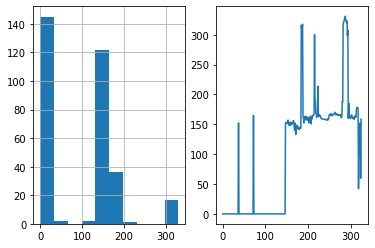

D105流化氢气流量


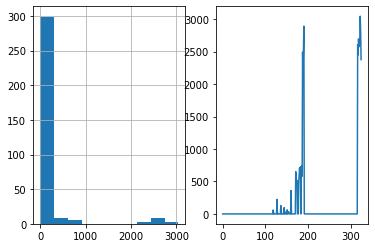

新氢进装置流量


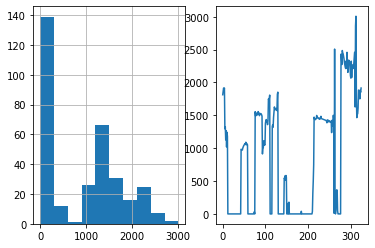

轻烃出装置流量


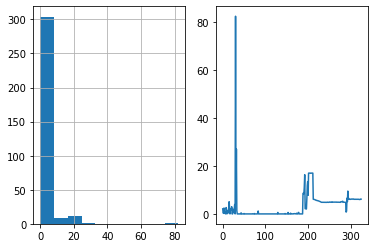

污油出装置


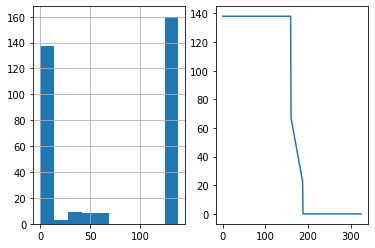

1#催化汽油进装置流量


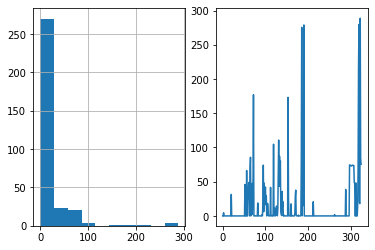

D121顶去放火炬流量


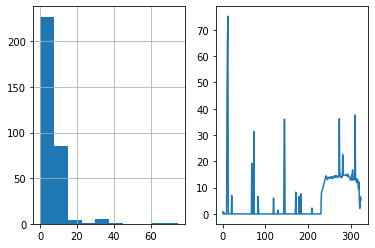

再生冷氮气流量


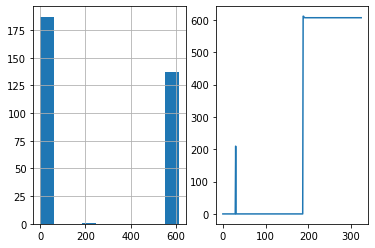

0.2


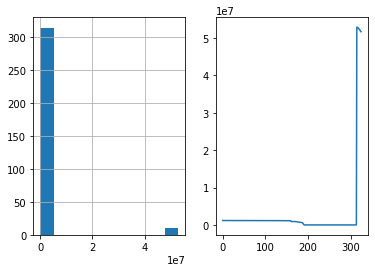

新氢进装置流量.1


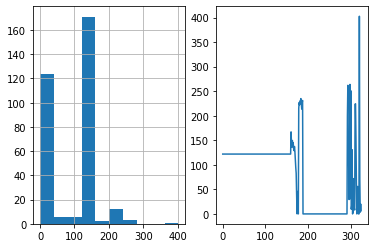

0.20


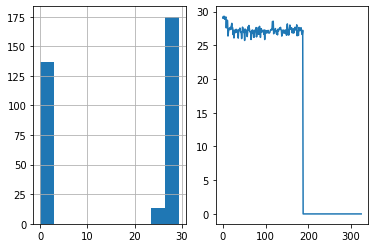

D-109松动风流量


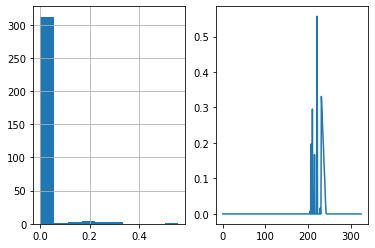

进料调节阀旁路流量


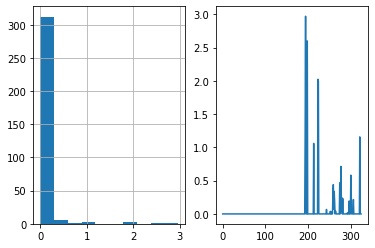

紧急氢气去D-102流量


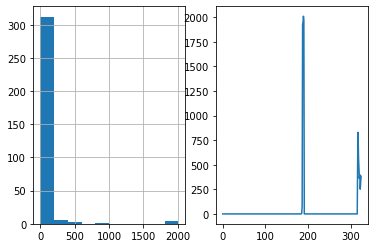

补充氢压缩机出口返回管流量


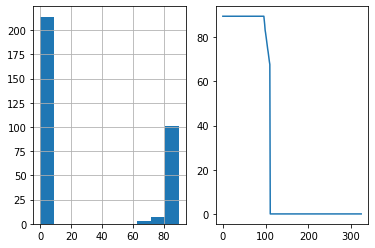

EH-102加热元件/A束温度


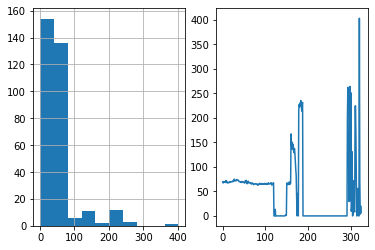

D-201含硫污水排量


In [178]:
columns = df.columns[eq_0>H]
print(f"many 0 n_columns = {len(columns)}")
for column in columns:
    plt.set
    plt.subplot(1,2,1)
    (df[column].hist())
    plt.subplot(1,2,2)
    plt.plot(df[column].index, df[column].tolist())
    plt.show()
    print(column)

<AxesSubplot:>

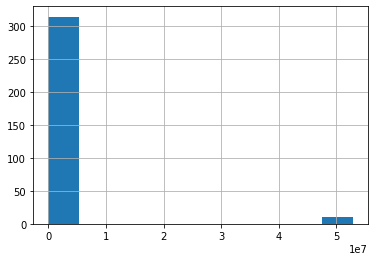

In [180]:
df["新氢进装置流量.1"].hist()

<AxesSubplot:>

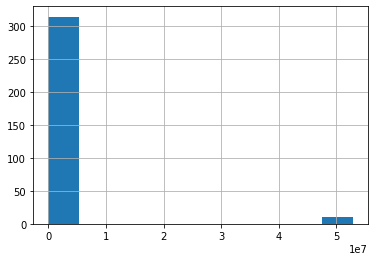

In [184]:
df["新氢进装置流量.1"].hist()

In [169]:
ops.shape

(325, 354)

In [171]:
np.count_nonzero(ops.var(axis=1)==0)

0

In [172]:
ops.var(axis=1)

0      2.998285e+13
1      2.950494e+13
2      2.931425e+13
3      2.883619e+13
4      2.864182e+13
           ...     
320    3.897797e+13
321    3.876678e+13
322    3.845684e+13
323    3.825577e+13
324    3.805968e+13
Length: 325, dtype: float64

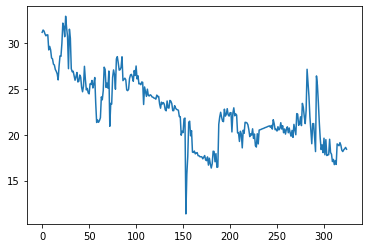

In [176]:
I=1; plt.plot(ops.iloc[:,I].index, ops.iloc[:,I].tolist())

In [57]:
df.columns[eq_0>50]

Index(['D105流化氢气流量', '新氢进装置流量', '轻烃出装置流量', '污油出装置', '1#催化汽油进装置流量',
       'D121顶去放火炬流量', '再生冷氮气流量', '0.2', '新氢进装置流量.1', '0.20', 'D-109松动风流量',
       '进料调节阀旁路流量', '紧急氢气去D-102流量', '补充氢压缩机出口返回管流量', '闭锁料斗H2过滤器出口气流量',
       'EH-102加热元件/A束温度', 'D-201含硫污水排量', '汽油产品去气分流量'],
      dtype='object')

In [133]:
ops=df.iloc[:,16:]

In [148]:
ops.columns[np.var(ops.values, axis=0)<0.001]

Index(['氢油比', '稳定塔顶压力', '燃料气进装置压力', '氮气进装置压力', '非净化风进装置压力', '净化风进装置压力',
       '原料换热器管程进出口压差', '辐射室出口压力', '加热炉主火嘴阀前压力', '再生器压力', 'D-203顶部出口管',
       'D-124压力', 'D-123压力', 'D-122液位液位', 'D-109压力', 'D-107顶压力', 'D-107底压力',
       'D-113压力', '精制汽油出装置线压力', '鼓风机入口压力', 'R-102下部压力', 'R-102底排放滑阀后氮气线压力',
       'F-101长明灯线压力', 'S_ZORB AT-0005', '反应器线速'],
      dtype='object')

In [76]:
d285 = pd.read_csv("285.csv")

In [78]:
op_df = pd.read_excel("附件四：354个操作变量信息.xlsx")

In [80]:
op_df["取值范围"]

0        0.20-0.37
1            10-35
2        2.35-2.70
3         600-1000
4          410-435
          ...     
349     60-5500000
350     0-40000000
351    -14000-3500
352     0-40000000
353       -125-0.5
Name: 取值范围, Length: 354, dtype: object

In [83]:
from parse import compile

In [84]:
pattern = compile("{}-{}")

In [92]:
parsed=op_df["取值范围"].apply(lambda x: pattern.parse(x))

In [106]:
op_df["lower"]=pd.to_numeric(parsed.apply(lambda x:eval(x[0])))

In [108]:
op_df["upper"]=pd.to_numeric(parsed.apply(lambda x:eval(x[1].replace("（","(").replace("）",")"))))

In [125]:
for i in range(354):
    logic = ~np.logical_and(d285.iloc[:,i+1]>=op_df.loc[i,"lower"] , d285.iloc[:,i+1]<=op_df.loc[i,"upper"])
    n_invalids = (logic.sum())
    if n_invalids>0:
        print(i, n_invalids)

48 40
83 40
110 40
